In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('steam_games_clean.csv')

In [3]:
steam_user_json = open('byniick_gamelist.json')
steam_user = json.load(steam_user_json)

In [4]:
df.head()

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,original_price,discount_price,total_reviews,approximate_total_sales
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,7,7,id Software,"Bethesda Softworks,Bethesda Softworks","['FPS', 'Gore', 'Action', 'Demons', 'Shooter',...","['Single-player', 'Multi-player', 'Co-op', 'St...","['English', 'French', 'Italian', 'German', 'Sp...",['Action'],19.99,14.99,42550.0,1744550.0
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,4,4,PUBG Corporation,"PUBG Corporation,PUBG Corporation","['Survival', 'Shooter', 'Multiplayer', 'Battle...","['Multi-player', 'Online Multi-Player', 'Stats']","['English', 'Korean', 'Simplified Chinese', 'F...","['Action', 'Adventure', 'Massively Multiplayer']",29.99,NaN,836608.0,34300928.0
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,4,5,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","['Mechs', 'Strategy', 'Turn-Based', 'Turn-Base...","['Single-player', 'Multi-player', 'Online Mult...","['English', 'French', 'German', 'Russian']","['Action', 'Adventure', 'Strategy']",39.99,NaN,7030.0,288230.0
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,4,4,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","['Survival', 'Zombies', 'Open World', 'Multipl...","['Multi-player', 'Online Multi-Player', 'Steam...","['English', 'French', 'Italian', 'German', 'Sp...","['Action', 'Adventure', 'Massively Multiplayer']",44.99,NaN,167115.0,6851715.0
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,4,5,CCP,"CCP,CCP","['Space', 'Massively Multiplayer', 'Sci-fi', '...","['Multi-player', 'Online Multi-Player', 'MMO',...","['English', 'German', 'Russian', 'French']","['Action', 'Free to Play', 'Massively Multipla...",0.00,NaN,11481.0,470721.0


In [5]:
df.shape

(27807, 15)

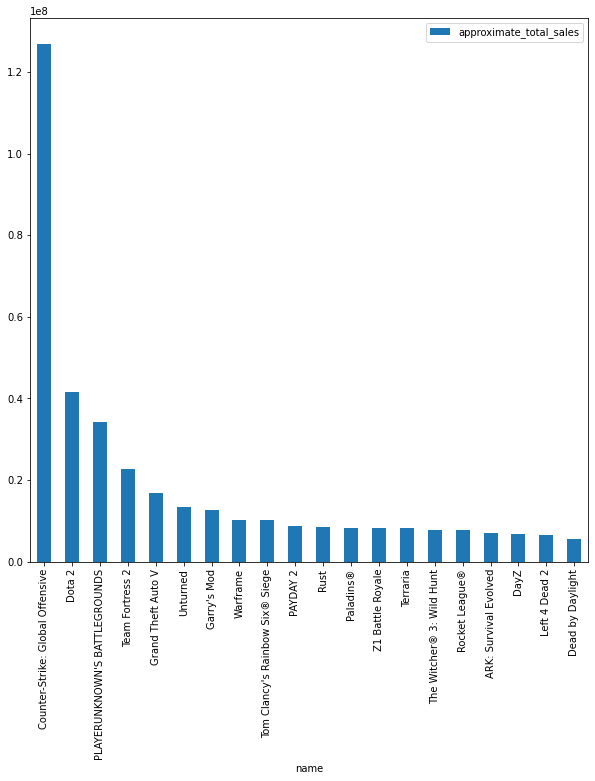

In [6]:
sorted = df.sort_values(by="approximate_total_sales", ascending=False).head(20)
vendas = sorted.plot(x='name',y="approximate_total_sales",figsize=(10,10), kind="bar")

In [7]:
def getGamesByTag(tag):
    
    games = {}
    for i, row in df.iterrows():
        popular_tags = row['popular_tags']
        approximate_total_sales = row['approximate_total_sales']
        game = row['name']

        if type(popular_tags) != float:
            if tag in popular_tags:
                games[game] = approximate_total_sales
    
    return games

In [8]:
gamesFPS = getGamesByTag('FPS')

In [9]:
gamesFPS

{'DOOM': 1744550.0,
 "PLAYERUNKNOWN'S BATTLEGROUNDS": 34300928.0,
 'DayZ': 6851715.0,
 'Call of Duty®: Modern Warfare® Remastered': 45838.0,
 'War Robots': 73677.0,
 'Call of Duty®: Black Ops': 171790.0,
 'Portal': 1657384.0,
 'Star Wars: Battlefront 2 (Classic, 2005)': 1123277.0,
 'Counter-Strike: Source': 1878989.0,
 'Bright Memory(Early Access) / 光明记忆': 318939.0,
 'Dishonored®: Death of the Outsider™': 98236.0,
 'Realm Royale': 1136028.0,
 'Call of Duty®: WWII': 520823.0,
 'Fishing Planet': 579658.0,
 'BioShock Infinite': 2429332.0,
 'Dungeons & Dragons Online®': 100614.0,
 'JUMP FORCE': 109757.0,
 'Ring of Elysium': 2252458.0,
 'Heroes & Generals': 4153669.0,
 'Ultimate Doom': 143951.0,
 'Freestyle 2: Street Basketball': 331977.0,
 'Warface': 1956356.0,
 'Generation Zero': 110044.0,
 'DUSK': 141532.0,
 'Sniper Elite 4': 457888.0,
 'Call of Duty®: Modern Warfare® 3': 0.0,
 'SCUM': 909257.0,
 'PlanetSide 2': 1822614.0,
 'Far Cry® 5': 1284858.0,
 'Hot Dogs, Horseshoes & Hand Grenades'

In [10]:
df_fps = pd.DataFrame(gamesFPS.items())

In [11]:
df_fps.head()

,0,1
0,DOOM,1744550.0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,34300928.0
2,DayZ,6851715.0
3,Call of Duty®: Modern Warfare® Remastered,45838.0
4,War Robots,73677.0


In [12]:
df_fps.shape

(1222, 2)

In [13]:
df_fps.columns = ['name','approximate_total_sales']

In [14]:
df_fps.head()

,name,approximate_total_sales
0,DOOM,1744550.0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,34300928.0
2,DayZ,6851715.0
3,Call of Duty®: Modern Warfare® Remastered,45838.0
4,War Robots,73677.0


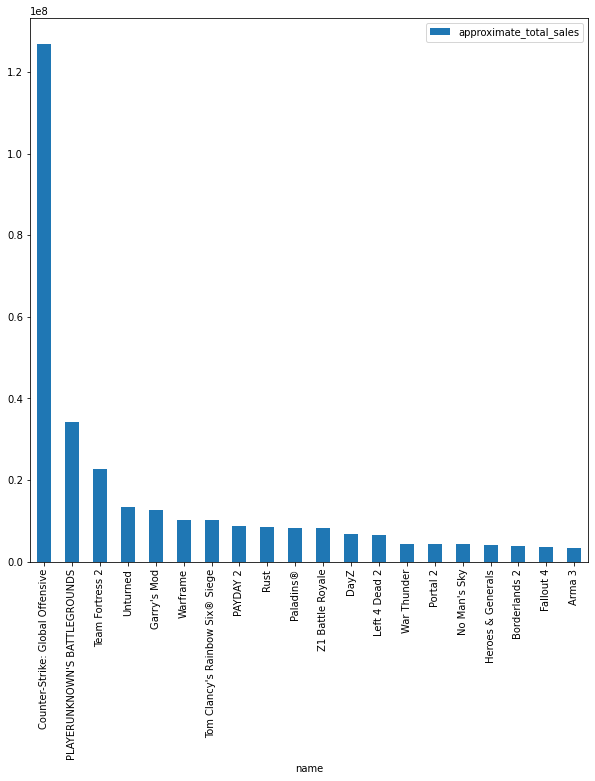

In [15]:
sorted = df_fps.sort_values(by='approximate_total_sales', ascending=False).head(20)
fps = sorted.plot(x='name',y='approximate_total_sales',figsize=(10,10), kind="bar")

In [16]:
# Alguns preços com desconto estavam maior que o preço original

# Preenchemos com NaN esses casos
df.loc[df.discount_price > df.original_price,'discount_price'] = np.nan
# Preenchemos os NaNs com preço original, ou seja, 0% de desconto
df.discount_price.fillna(value=df.original_price,inplace=True)

In [17]:
# Criação da coluna de percentual de desconto
df['discount_perc'] = np.trunc((1 - (df['discount_price'] / df['original_price'])) * 100)

df.discount_perc.fillna(value=0.0,inplace=True)

In [18]:
df.head(20)

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,original_price,discount_price,total_reviews,approximate_total_sales,discount_perc
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,7,7,id Software,"Bethesda Softworks,Bethesda Softworks","['FPS', 'Gore', 'Action', 'Demons', 'Shooter',...","['Single-player', 'Multi-player', 'Co-op', 'St...","['English', 'French', 'Italian', 'German', 'Sp...",['Action'],19.99,14.99,42550.0,1744550.0,25.0
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,4,4,PUBG Corporation,"PUBG Corporation,PUBG Corporation","['Survival', 'Shooter', 'Multiplayer', 'Battle...","['Multi-player', 'Online Multi-Player', 'Stats']","['English', 'Korean', 'Simplified Chinese', 'F...","['Action', 'Adventure', 'Massively Multiplayer']",29.99,29.99,836608.0,34300928.0,0.0
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,4,5,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","['Mechs', 'Strategy', 'Turn-Based', 'Turn-Base...","['Single-player', 'Multi-player', 'Online Mult...","['English', 'French', 'German', 'Russian']","['Action', 'Adventure', 'Strategy']",39.99,39.99,7030.0,288230.0,0.0
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,4,4,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","['Survival', 'Zombies', 'Open World', 'Multipl...","['Multi-player', 'Online Multi-Player', 'Steam...","['English', 'French', 'Italian', 'German', 'Sp...","['Action', 'Adventure', 'Massively Multiplayer']",44.99,44.99,167115.0,6851715.0,0.0
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,4,5,CCP,"CCP,CCP","['Space', 'Massively Multiplayer', 'Sci-fi', '...","['Multi-player', 'Online Multi-Player', 'MMO',...","['English', 'German', 'Russian', 'French']","['Action', 'Free to Play', 'Massively Multipla...",0.00,0.00,11481.0,470721.0,0.0
5,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,7,7,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","['Action', 'Hack and Slash', 'Great Soundtrack...","['Single-player', 'Online Multi-Player', 'Onli...","['English', 'French', 'Italian', 'German', 'Sp...",['Action'],59.99,59.99,9645.0,395445.0,0.0
6,https://store.steampowered.com/app/477160/Huma...,app,Human: Fall Flat,7,7,No Brakes Games,"Curve Digital,Curve Digital","['Funny', 'Multiplayer', 'Co-op', 'Puzzle', 'P...","['Single-player', 'Online Multi-Player', 'Loca...","['English', 'French', 'German', 'Spanish - Spa...","['Adventure', 'Indie']",14.99,14.99,23763.0,974283.0,0.0
7,https://store.steampowered.com/app/644930/They...,app,They Are Billions,7,7,Numantian Games,"Numantian Games,Numantian Games","['Early Access', 'Base Building', 'Strategy', ...","['Single-player', 'Steam Achievements', 'Steam...","['English', 'Spanish - Spain', 'French', 'Germ...","['Strategy', 'Early Access']",29.99,29.99,12127.0,497207.0,0.0
8,https://store.steampowered.com/app/774241/Warh...,app,Warhammer: Chaosbane,-1,4,Eko Software,"Bigben Interactive,Bigben Interactive","['RPG', 'Adventure', 'Hack and Slash', 'Action...","['Single-player', 'Multi-player', 'Co-op', 'On...","['English', 'French', 'Italian', 'German', 'Sp...","['Action', 'Adventure', 'RPG']",49.99,49.99,904.0,37064.0,0.0
9,https://store.steampowered.com/app/527230/For_...,app,For The King,7,7,IronOak Games,"Curve Digital,Curve Digital","['RPG', 'Turn-Based Combat', 'Adventure', 'Onl...","['Single-player', 'Multi-player', 'Online Mult...","['English', 'French', 'Italian', 'German', 'Sp...","['Adventure', 'Indie', 'RPG', 'Strategy']",19.99,19.99,4600.0,188600.0,0.0


In [19]:
# Nosso principal score é o total aproximado de vendas
# Então por facilidade vamos o df de forma decrescente por esse coluna

df = df.sort_values('approximate_total_sales',ascending = False)
df = df.reset_index(drop=True)

In [20]:
df.head(20)

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,original_price,discount_price,total_reviews,approximate_total_sales,discount_perc
0,https://store.steampowered.com/app/730/Counter...,app,Counter-Strike: Global Offensive,7,7,"Valve,Hidden Path Entertainment","Valve,Valve","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Multi-player', 'Steam Achievements', 'Full c...","['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['Action', 'Free to Play']",0.00,0.00,3094223.0,126863143.0,0.0
1,https://store.steampowered.com/app/570/Dota_2/,app,Dota 2,5,7,Valve,"Valve,Valve","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['Multi-player', 'Co-op', 'Steam Trading Cards...","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Action', 'Free to Play', 'Strategy']",0.00,0.00,1015621.0,41640461.0,0.0
2,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,4,4,PUBG Corporation,"PUBG Corporation,PUBG Corporation","['Survival', 'Shooter', 'Multiplayer', 'Battle...","['Multi-player', 'Online Multi-Player', 'Stats']","['English', 'Korean', 'Simplified Chinese', 'F...","['Action', 'Adventure', 'Massively Multiplayer']",29.99,29.99,836608.0,34300928.0,0.0
3,https://store.steampowered.com/app/440/Team_Fo...,app,Team Fortress 2,7,7,Valve,"Valve,Valve","['Free to Play', 'Multiplayer', 'FPS', 'Shoote...","['Multi-player', 'Cross-Platform Multiplayer',...","['English', 'Danish', 'Dutch', 'Finnish', 'Fre...","['Action', 'Free to Play']",0.00,0.00,553458.0,22691778.0,0.0
4,https://store.steampowered.com/app/271590/Gran...,app,Grand Theft Auto V,5,5,Rockstar North,"Rockstar Games,Rockstar Games","['Open World', 'Action', 'Multiplayer', 'Third...","['Single-player', 'Multi-player', 'Steam Achie...","['English', 'French', 'Italian', 'German', 'Sp...","['Action', 'Adventure']",29.99,29.99,407706.0,16715946.0,0.0
5,https://store.steampowered.com/app/304930/Untu...,app,Unturned,7,7,Smartly Dressed Games,"Smartly Dressed Games,Smartly Dressed Games","['Free to Play', 'Survival', 'Zombies', 'Multi...","['Single-player', 'Online Multi-Player', 'Onli...",['English'],"['Action', 'Adventure', 'Casual', 'Free to Pla...",0.00,0.00,325675.0,13352675.0,0.0
6,https://store.steampowered.com/app/4000/Garrys...,app,Garry's Mod,7,8,Facepunch Studios,"Valve,Valve","['Sandbox', 'Multiplayer', 'Funny', 'Moddable'...","['Single-player', 'Multi-player', 'Co-op', 'Cr...","['English', 'French', 'Italian', 'German', 'Sp...","['Indie', 'Simulation']",9.99,9.99,310394.0,12726154.0,0.0
7,https://store.steampowered.com/app/230410/Warf...,app,Warframe,7,7,Digital Extremes,"Digital Extremes,Digital Extremes","['Free to Play', 'Action', 'Co-op', 'Multiplay...","['Single-player', 'Multi-player', 'Co-op', 'St...","['English', 'German', 'French', 'Italian', 'Ko...","['Action', 'Free to Play']",19.99,9.99,250319.0,10263079.0,50.0
8,https://store.steampowered.com/app/359550/Tom_...,app,Tom Clancy's Rainbow Six® Siege,7,7,Ubisoft Montreal,"Ubisoft,Ubisoft","['FPS', 'Multiplayer', 'Tactical', 'Shooter', ...","['Single-player', 'Multi-player', 'Co-op', 'St...","['English', 'French', 'Italian', 'German', 'Sp...",['Action'],19.99,19.99,248689.0,10196249.0,0.0
9,https://store.steampowered.com/app/218620/PAYD...,app,PAYDAY 2,7,7,OVERKILL - a Starbreeze Studio.,"Starbreeze Publishing AB,Starbreeze Publishing AB","['Co-op', 'Action', 'FPS', 'Heist', 'Online Co...","['Single-player', 'Multi-player', 'Co-op', 'On...","['English', 'German', 'French', 'Italian', 'Sp...","['Action', 'RPG']",9.99,9.99,215078.0,8818198.0,0.0


In [21]:
steam_user

[{'name': 'Half-Life 2', 'playtimeforever': 200},
 {'name': 'Portal', 'playtimeforever': 140},
 {'name': 'Call of Duty® 4: Modern Warfare®', 'playtimeforever': 1075},
 {'name': "Mirror's Edge™", 'playtimeforever': 193},
 {'name': 'Fallout 3: Game of the Year Edition', 'playtimeforever': 35},
 {'name': 'Mass Effect 2 (2010)', 'playtimeforever': 1080},
 {'name': 'Shatter', 'playtimeforever': 23},
 {'name': 'LEGO® Harry Potter: Years 1-4', 'playtimeforever': 113},
 {'name': 'Worms Reloaded', 'playtimeforever': 201},
 {'name': 'Magicka', 'playtimeforever': 168},
 {'name': 'Portal 2', 'playtimeforever': 1228},
 {'name': 'Killing Floor', 'playtimeforever': 598},
 {'name': 'AudioSurf', 'playtimeforever': 569},
 {'name': 'The Wonderful End of the World', 'playtimeforever': 2},
 {'name': 'AaAaAA!!! - A Reckless Disregard for Gravity',
  'playtimeforever': 267},
 {'name': '1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)',
  'playtimeforever': 67},
 {'name': 'Defense Grid: The Awakenin

In [22]:
#dicionario de dados review : score

dictReviews = {
    0 : "Overwhelmingly Negative",
    1 : "Very Negative Negative",
    2 : "Negative",
    3 : "Mostly Negative",
    4 : "Mixed",
    5 : "Mostly Positive",
    6 : "Positive",
    7 : "Very Positive",
    8 : "Overhwelmingly Positive"
}

In [36]:
#def getGamesByTag(tag):
#    
#    games = {}
#    for i, row in df.iterrows():
#        popular_tags = row['popular_tags']
#        approximate_total_sales = row['approximate_total_sales']
#        game = row['name']
#
#        if type(popular_tags) != float:
#            if tag in popular_tags:
#                games[game] = approximate_total_sales
#    
#    return games

#vai filtrando o df a cada tag não nula usando pd.loc

# , pAllReviews, pLanguage, pDeveloper, pPublisher, pGameDetails, pDiscountPerc
def searchGames(pTag):
    
    dfResult = pd.DataFrame()
    
    if pd.notna(pTag):
        dfResult = df.loc[df.popular_tags ]
        
    print(dfResult)

In [37]:
searchGames("FPS")

KeyError: 'FPS'